# A Brief Intoduction To Qnet

Hudson Leone <br>
Hudson.T.Leone@UTS.student.edu.au <br>
leoneht0@gmail.com <br>
13/04/20

In [1]:
# Networks
import networkx as nx
import QNET

# Utilities
import numpy as np
import random


#Plot functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import art3d
import matplotlib.animation as animation

# Sample graphs
from Graph1 import X as X1
from Graph2 import X as X2

# Interactive widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib widget

## What is Qnet?

Qnet will be an extention for the Python module NetworkX, which I'm currently developping under the supervision of Dr. Peter Rohde. Our intention is to produce a package capable of simulating realistic quantum networks on a graph theoretical level and provide users with intuitive tools for:

* Developing and testing new local protocols for quantum internet
* Implementing contemporary strategies for entanglement distribution such as through entanglement purification and entanglement swapping 
* Generating quantum networks of different sizes and topologies
* Evaluating costs unique to quantum communications such as coherence and fidelity 
* Simulating quantum networks with global satellite constellations.


## Why NetworkX?

NetworkX is a fast and robust Python package suitable for simmulating network structures of up to 10 million nodes and 100 million edges. The NetworkX library is large with many built-in optimization functions and has support from 3rd party visualisation packages such as Cytoscape, Gephi, Graphviz and, for LaTeX typesetting, PGF/TikZ.

For doccumentation please visit the [NetworkX website](https://networkx.github.io/documentation/latest/)

## Why Qnet?

Qnet emerges from the growing need for data scientists to research quantum networks without any such thing existing in the real world as of 2020. Our team envisions a dual network where quibits are communicated via the lossless entanglement channel. Say we have two communication parties, Alice and Bob, who each recieve half of a known entangled state such as a bell pair. Rather than encode a qubit and send it to Bob directly, Alice can communicate a qubit by manipulating her half of the bell pair, performing a measurement, and sending Bob the result.

This approach greatly simplifies the problem of communicating qubits. Rather than send a qubit directly through a lossy channel, we can focus on producing large numbers of known bell pairs, which can purified as they pass through the network. Additionally, the entanglement based network will continue to make use of existing infrastrucutre to communicate measurement results.

The purpose of Qnet is not to simulate the state of the bell pair as it travels to Alice and Bob, nor does it focus on a realistic implementation of low-level protocols. Instead, Qnet is intended as a way to calculate costs unique to quantum networks and then perform optimizations using existing mathematical and graph theory techniques.

# Implementation:

A Qnet is a subclass of networkX. Anything you'd want to do with NetworkX you can also do with Qnet.

TODO: 
* How much NetworkX documentation is necessary here?
* What features of NetworkX are the most important to communicate?
    * Djikstra path
    * What else?

In [3]:
myNet = QNET.Qnet()
myNet.add_node('A')
myNet.add_nodes_from(['B', 'C'])
print(myNet.nodes)
print("Easy as 1, 2, 3")

['A', 'B', 'C']
Easy as 1, 2, 3


## Qnodes:

Qnodes are the building blocks of Qnet. 

TODO:
* What can Qnodes do?
    * Tramsission of bits and qubits
    * Quantum measurements
    * Quantum memories
    * Interface between modes

The Qnode type is the default class, but different subclasses perform different functions.

TODO:
Qnodes can be initialized one at a time or initialized from an array of dictionaries.

In [4]:
Q = QNET.Qnet()
new_node = QNET.Qnode(name = 'Athos', coords = [1,2,3])
print(new_node)
Q.add_node(new_node)

Qnode.name: Athos -- Coords:[1, 2, 3] -- <class 'Node.Qnode'>


In [6]:
Q = QNET.Qnet()
new_nodes = [{'name': 'Porthos', 'coords':[2,3,4]}, {'name': 'Aramis', 'coords':[3,4,5]}]
Q.add_qnodes_from(new_nodes)

    
new_node = QNET.Satellite(name = 'Tesla Roadster', coords = [0,0,0], velocity = [1,1])
Q.add_node(new_node)

for node in Q.nodes():
    print(node)

Qnode.name: Porthos -- Coords:[2, 3, 4] -- <class 'Node.Qnode'>
Qnode.name: Aramis -- Coords:[3, 4, 5] -- <class 'Node.Qnode'>
Qnode.name: Tesla Roadster -- Coords:[0, 0, 0] -- <class 'Node.Satellite'>


### Grounds

Ground nodes are the entanglement sources of the network. For a quantum communication to be possible for two communication parties, there must be at least one ground node in the path connecting them.

### Satellites

Satellite nodes are like ground nodes, but with velocity and range attributes. Loss between satellites and nodes on the ground are calculated with an attribute function called airC

### Swappers

Swapper nodes perform a swapping operation via polarizing beam splitter. Given two pairs of bell states, the swapper measures the two innermost qubits and projects the entanglement on the outermost qubits with probability 1/2. In order for the swapper to work, there must be at least two ground stations on the path with the swapper, one on either side.

TODO:
* More detail here
* Link to New Paper

## Channels

Channels in Qnet currently work the same as edges in NetworkX. Given two nodes you can initialise an edge between them one by one or from a list of dictionaries. Any attributes aside from 'edge' will be added into a cost vector associated with that channel.

TODO:

In [5]:
Q = QNET.Qnet()
new_nodes = [{'name': 'A', 'coords':[0,0,0]},
             {'name': 'B', 'coords':[1,1,1]}, 
             {'name': 'C', 'coords':[2,2,2]},
            {'name': 'D', 'coords':[3,3,3]}]

new_chans = [{'edge': ('A', 'B'), 'Loss':100},
            {'edge': ('B', 'C'), 'Fid': 0.5},
            {'edge': ('B', 'D'), 'Language':'French'},
            {'edge': ('D', 'A')}]

Q.add_qnodes_from(new_nodes)
Q.add_qchans_from(new_chans)

for node in Q.nodes:
    print(node)
    
print('\n')

Q.print_qchans()

Qnode.name: A -- Coords:[0, 0, 0] -- <class 'Node.Qnode'>
Qnode.name: B -- Coords:[1, 1, 1] -- <class 'Node.Qnode'>
Qnode.name: C -- Coords:[2, 2, 2] -- <class 'Node.Qnode'>
Qnode.name: D -- Coords:[3, 3, 3] -- <class 'Node.Qnode'>


A <--> B -- Costs: {'Loss': 100}
A <--> D -- Costs: {}
B <--> C -- Costs: {'Fid': 0.5}
B <--> D -- Costs: {'Language': 'French'}


## Costs:

Qnet can work with a variety of cost types

* P <br>
    Probability of a successful Bell pair transmission
* Q <br> 
    Dephasing probability: <br> Q = 1 - P
* loss <br>
    Decibelic form of P: <br> loss = -ln(P) <br>
* gain <br>
    Decibelic form of Q: <br> gain = -ln(Q) <br>
    
TODO:
* Discuss fidelity
* Discuss coherence
* Should I discuss holistically or specifically in terms of bell pairs?

## Paths

The Path class in Qnet is a quick and easy way to keep track of important paths in Qnet and also offers a simple cost() method for determining the cost of the path for various metrics:

TODO: 
* Example of paths

## Visualising Qnet Structures

TODO:
* Example

# Example 1: LinSat

In this example, we'll consider a linear network with one ground node and a satellite tracking in an overhead plane:

In [6]:
from Graph1 import X as X1

for node in X1:
    print(node)
print('\n')
X1.print_qchans()

Qnode.name: A -- Coords:[50, 0, 0] -- <class 'Node.Qnode'>
Qnode.name: B -- Coords:[150, 0, 0] -- <class 'Node.Qnode'>
Qnode.name: G -- Coords:[100, 0, 0] -- <class 'Node.Ground'>
Qnode.name: S -- Coords:[0, 0, 100] -- <class 'Node.Satellite'>


A <--> G -- Costs: {'loss': 0.15}
A <--> S -- Costs: {'loss': 0.1361474405744575}
B <--> G -- Costs: {'loss': 0.15}
B <--> S -- Costs: {'loss': 0.21953115153648722}


In [3]:
from Graph1 import X as X1

def plotPaths(Q, tMax, Vx_sat, Vy_sat, swapper_prob, with_purification = True):
    
    # Set satellite velocity to user input
    S = Q.getNode('S')
    S.velocity = [Vx_sat, Vy_sat]
    
    # Set swapper probability to user input
    try:
        T = Q.getNode('T')
        T.prob = swapper_prob
    except:
        pass
    
    # Time increment
    dt = 0.01
    
    # Get Time Array
    timeArr = QNET.getTimeArr(tMax, dt)
    
    # Plot the losses of every simple path over time
    pathDict = QNET.getLossArrays(Q, 'A', 'B', 'loss', tMax, dt)
    for path in pathDict:
        plt.plot(timeArr, pathDict[path], label = path.stringify())
        
    # Get the array of optimal costs over time
    optArr = QNET.getOptimalLossArray(Q, 'A', 'B', 'loss', tMax, dt, with_purification)
    line = plt.plot(timeArr, optArr, linestyle = ':', c = 'k', label = 'Optimal Path Cost')
    plt.setp(line, linewidth = 3)  
    
    plt.xlabel('time')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    
interact(plotPaths, 
         Q = fixed(X1),
         tMax = (1, 20, 1), 
         Vx_sat =  (0, 20, 1), 
         Vy_sat = (0, 20, 1), 
         swapper_prob = (0.5, 1, 0.1),
         with_purification = fixed(False))

interactive(children=(IntSlider(value=10, description='tMax', max=20, min=1), IntSlider(value=10, description=…

<function __main__.plotPaths(Q, tMax, Vx_sat, Vy_sat, swapper_prob, with_purification=True)>

# Example 2: Entanglement swapping and purification

In [2]:
from Graph2 import X as X2

def plotPaths(Q, tMax, Vx_sat, Vy_sat, swapper_prob, with_purification = True):
    
    # Set satellite velocity to user input
    S = Q.getNode('S')
    S.velocity = [Vx_sat, Vy_sat]
    
    # Set swapper probability to user input
    T = Q.getNode('T')
    T.prob = swapper_prob
    
    # Time increment
    dt = 0.01
    
    # Get Time Array
    timeArr = QNET.getTimeArr(tMax, dt)
    
    # Plot the losses of every simple path over time
    pathDict = QNET.getLossArrays(Q, 'A', 'B', 'loss', tMax, dt)
    for path in pathDict:
        plt.plot(timeArr, pathDict[path], label = path.stringify())
        
    # Get the array of optimal costs over time
    optArr = QNET.getOptimalLossArray(Q, 'A', 'B', 'loss', tMax, dt, with_purification)
    line = plt.plot(timeArr, optArr, linestyle = ':', c = 'k', label = 'Optimal Path Cost')
    plt.setp(line, linewidth = 3)  
    
    plt.xlabel('time')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    
interact(plotPaths, 
         Q = fixed(X2), 
         tMax =(1, 20, 1), 
         Vx_sat =  (0, 20, 1), 
         Vy_sat = (0, 20, 1),
         swapper_prob = (0.5, 1, 0.1),
         with_purification = False)

interactive(children=(IntSlider(value=10, description='tMax', max=20, min=1), IntSlider(value=10, description=…

<function __main__.plotPaths(Q, tMax, Vx_sat, Vy_sat, swapper_prob, with_purification=True)>

# Example 3: Large purification graph
TODO:
Necessary?

# Qnet Generators

TODO:
* Linear generator demo

# Satellite Network
TODO

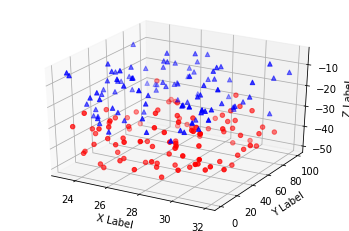

In [5]:
'''
==============
3D scatterplot
==============

Demonstration of a basic scatterplot in 3D.
'''

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Note widget requires external packkage jupyter matplotlib
# %matplotlib widget

for node in X2.nodes:
    x = node.coords[0]
    y = node.coords[1]
    z = node.coords[2]
    
    # TODO: Create different markers depending on node type
    ax.scatter(x, y, z, c = 'b', marker = 'o')
    ax.text(x, y, z, '%s' % node.name, size=12, zorder=1)
    
    # Todo: Figure out how to offset text.

for edge in X2.edges:
    xs = [edge[0].coords[0], edge[1].coords[0]]
    ys = [edge[0].coords[1], edge[1].coords[1]]
    zs = [edge[0].coords[2], edge[1].coords[2]]
    
    # TODO: Set custom line styles depending on which nodes are being connected
    # TODO: Label lines with costs
    
    if (isinstance(edge[0], QNET.Satellite) or isinstance(edge[1], QNET.Satellite)):
        line = art3d.Line3D(xs, ys, zs, linestyle = '--')
    
    else:
        line = art3d.Line3D(xs, ys, zs)
        
    ax.add_line(line)

plt.show()
    

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Traceback (most recent call last):
  File "/home/hudson/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/hudson/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 953, in _start
    self._init_draw()
  File "/home/hudson/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1732, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/home/hudson/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
TypeError: update() argument after * must be an iterable, not float


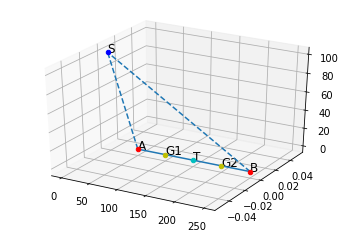

In [2]:
## This function takes a Qnet graph and returns a figure
def Qnet3dPlot(Q):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Note widget requires external packkage jupyter matplotlib
    # %matplotlib widget

    for node in X2.nodes:
        x = node.coords[0]
        y = node.coords[1]
        z = node.coords[2]
    
        # Dictionary between colours and node types
        qnode_color = {QNET.Qnode:'r', QNET.Ground:'y', QNET.Swapper:'c', QNET.Satellite:'b'}
        
        ax.scatter(x, y, z, c = qnode_color[type(node)], marker = 'o')
        ax.text(x, y, z, '%s' % node.name, size=12, zorder=1)
    
        # Todo: Figure out how to offset text.

    for edge in X2.edges:
        xs = [edge[0].coords[0], edge[1].coords[0]]
        ys = [edge[0].coords[1], edge[1].coords[1]]
        zs = [edge[0].coords[2], edge[1].coords[2]]
    
        # TODO: Set custom line styles depending on which nodes are being connected
        # TODO: Label lines with costs
    
        if (isinstance(edge[0], QNET.Satellite) or isinstance(edge[1], QNET.Satellite)):
            line = art3d.Line3D(xs, ys, zs, linestyle = '--')
    
        else:
            line = art3d.Line3D(xs, ys, zs)
        
        ax.add_line(line)
        
    return fig

def QnetAnimation(Q, dt):
    
    # TODO:
    # Might need a special init function to make the animation go.

    # Creating the Animation object
    line_ani = animation.FuncAnimation(Qnet3dPlot(Q), func = Q.update, frames = 500, 
                                       fargs=(dt), interval=50, blit=False)
    plt.show()

QnetAnimation(X2, dt = 0.01)